In [1]:
# collect the score histories and minimum energies accross multiple runs to visualize. 

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
#####################################################################################################################################################
# User Input ######################################################################
#####################################################################################################################################################
proteins = [    
                    'T0955',
                    'T0980s2',
                    'T1072s2', 
                    'T0953s1',
                    'T0974s1', 
                    'T1046s1', 
                    'T0884', 
                    'T1006',
                    'T1008' 
                ]
lengths = [
            41, 
            52, 
            69, 
            72, 
            72, 
            74, 
            75, 
            79, 
            80
            ]
folder_names = [    
                    '../out/fig1_mh',
                    '../out/fig1_mh_noisyrestart',
                    '../out/fig1_altmh',
                    '../out/fig1_gd_iter100' ,
                    '../out/fig1_gd_lmh_90_10',
                    '../out/fig1_gd_nr_mhcriterion',
                ]

labels = ['mh', 'mh+nr', 'mh+locmh', 'gd', 'gd+locmh','gd+mhcrit']
colors = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4','#66c2a5','#3288bd','#5e4fa2']
# colors_proteins = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4','#66c2a5','#3288bd','#5e4fa2']
colors_proteins = ['#feafc7', '#75d6ec', '#010101', '#3b8072', '#ff1d25', '#fe941d', '#D3D303', '#06bd02', '#011a98', '#760188']
skip_methods = []
# plot_proteins = [0]

build_lineplot = False

build_swarmplot = True
boxplot_overlay = False


num_scores_per_history = 10000
num_runs = 10

#####################################################################################################################################################
# Read Data ######################################################################
#####################################################################################################################################################
num_methods = len(folder_names)
samples = {'run': [], 'min_energy':[], 'method':[], 'protein':[], 'length':[]}
sh = [] # sh[method][protein] = (10 x score_history)
for i in range(num_methods):
    if i in skip_methods:
        continue
    count = 0
    sh_per_method = []
    ytemp = np.zeros((1, num_scores_per_history))
    mintemp, protein_per_sample = [], []
    for ip, p in enumerate(proteins):   
        print('processing: ', p)      
        for run in range(num_runs):
            filename = folder_names[i]+'/'+p+'/'+str(run)+'/'+'info.csv'
            if os.path.exists(filename): 
                df_info = pd.read_csv(filename)
                score_history = df_info.loc[:]['score_history'].tolist()[0:num_scores_per_history]
                if np.sum(ytemp) == 0: 
                    ytemp = np.array(score_history)
                else:
                    ytemp = np.vstack((ytemp, np.array(score_history)))

            # store results for this run
            samples['run'].append(count)
            samples['min_energy'].append(np.amin(np.array(score_history)))
            samples['method'].append(labels[i])
            samples['protein'].append(p)
            samples['length'].append(lengths[ip])
            count += 1

        sh_per_method.append(ytemp)
    sh.append(sh_per_method)
sh = np.array(sh)
print(sh.shape)
# print('minimum in T0955 by mhcrit: ', np.min(sh[4]))



processing:  T0955
processing:  T0980s2
processing:  T1072s2
processing:  T0953s1
processing:  T0974s1
processing:  T1046s1
processing:  T0884
processing:  T1006
processing:  T1008
processing:  T0955
processing:  T0980s2
processing:  T1072s2
processing:  T0953s1
processing:  T0974s1
processing:  T1046s1
processing:  T0884
processing:  T1006
processing:  T1008
processing:  T0955
processing:  T0980s2
processing:  T1072s2
processing:  T0953s1
processing:  T0974s1
processing:  T1046s1
processing:  T0884
processing:  T1006
processing:  T1008
processing:  T0955
processing:  T0980s2
processing:  T1072s2
processing:  T0953s1
processing:  T0974s1
processing:  T1046s1
processing:  T0884
processing:  T1006
processing:  T1008
processing:  T0955
processing:  T0980s2
processing:  T1072s2
processing:  T0953s1
processing:  T0974s1
processing:  T1046s1
processing:  T0884
processing:  T1006
processing:  T1008
processing:  T0955
processing:  T0980s2
processing:  T1072s2
processing:  T0953s1
processing:  

d:\Tools\Anaconda\envs\mcmd\lib\site-packages\ipykernel_launcher.py:94: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# random calculations 

In [9]:

# improvement in percent for each protein of Alt-mh over other methods
samples = pd.DataFrame(samples)
for i,method in enumerate(samples['method'].unique()):
    meth_df = samples[samples['method'] == method]
    print('{} mean = {}'.format(method, meth_df['min_energy'].mean()))
print('-----------------------------')
m1 = samples[samples['method'] == 'mh']
m2 = samples[samples['method'] == 'mh+nr']
m3 = samples[samples['method'] == 'mh+locmh']

avg = {}

for ii,protein in enumerate(samples['protein'].unique()):
    prot_df = samples[samples['protein'] == protein]
    avg[protein] = []
    for i,method in enumerate(prot_df['method'].unique()):
        meth = prot_df[prot_df['method'] == method]
        avg[protein].append(meth['min_energy'].mean())
        
for protein in avg:
    print(protein)
    # print('improvement of altmh over mh for {}: {}',(avg[protein][2] - avg[protein][0])/avg[protein][0])
    # print('improvement of altmh over mh+nr for {}: {}',(avg[protein][2] - avg[protein][1])/avg[protein][1])
    # print('improvement of altmh over gd for {}: {}',(avg[protein][2] - avg[protein][3])/avg[protein][3])
    print('improvement of gd+locmh over gd for {}: {}',(avg[protein][4] - avg[protein][3])/avg[protein][3])
    print('improvement of gd+mhcrit over gd for {}: {}',(avg[protein][5] - avg[protein][3])/avg[protein][3])





mh mean = -24469.031882932373
mh+nr mean = -31387.94335461472
mh+locmh mean = -33981.54536632254
gd mean = -39278.09702463883
gd+locmh mean = -39073.404493911505
gd+mhcrit mean = -39888.257544232365
-----------------------------
T0955
improvement of gd+locmh over gd for {}: {} -0.029070956708202245
improvement of gd+mhcrit over gd for {}: {} 0.011738731959833286
T0980s2
improvement of gd+locmh over gd for {}: {} -0.12827459979661518
improvement of gd+mhcrit over gd for {}: {} 0.016717992416929013
T1072s2
improvement of gd+locmh over gd for {}: {} -0.09954687505188474
improvement of gd+mhcrit over gd for {}: {} -0.03955483599255007
T0953s1
improvement of gd+locmh over gd for {}: {} -0.03593210019220908
improvement of gd+mhcrit over gd for {}: {} -0.008864564859880924
T0974s1
improvement of gd+locmh over gd for {}: {} 0.2373211832436544
improvement of gd+mhcrit over gd for {}: {} 0.3234040935725249
T1046s1
improvement of gd+locmh over gd for {}: {} -0.028907864970971444
improvement of gd

# lineplot


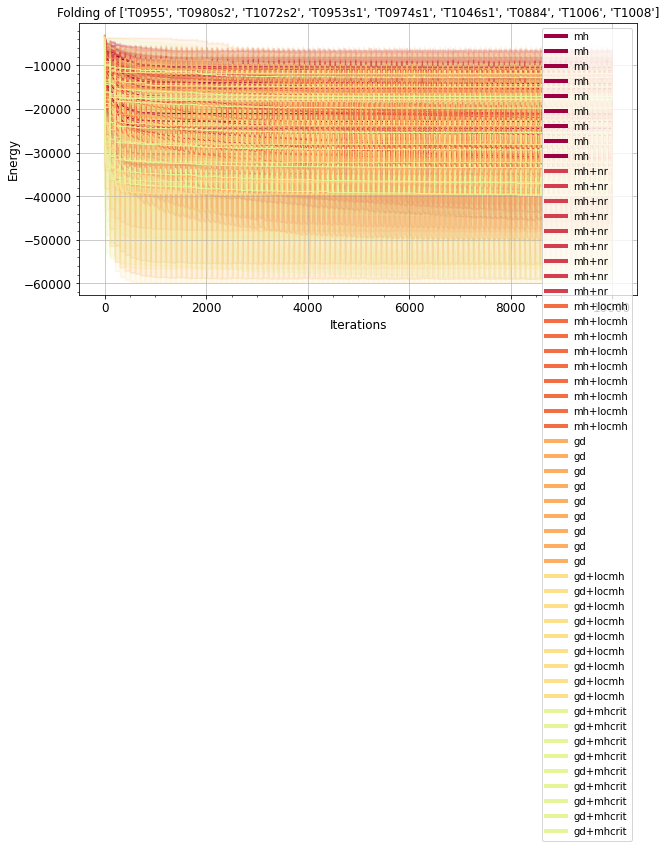

In [2]:
fig, ax = plt.subplots(figsize=(10,5))
# random.seed(9)
next_method = 0
x = np.arange(0,num_scores_per_history)
for i in range(num_methods):
    if i in skip_methods:
            continue
    for p in range(len(proteins)):
        

        # color = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])][0]
        stds = np.std(sh[next_method][p], axis=0)
        means = np.mean(sh[next_method][p],axis=0)
        minus_std = means-stds
        plus_std = means+stds

        ax.plot(x, means, color=colors[i], alpha=1, label=labels[i], linewidth=1)
        ax.plot(x,minus_std, color=colors[i], alpha=0.15)
        ax.plot(x,plus_std, color=colors[i], alpha=0.15)
        ax.fill_between(x, minus_std, plus_std, color=colors[i], alpha=.1)
    next_method += 1
ax.grid(b=True, which='major', axis='both', linestyle='-', alpha=0.8)
# ax.grid(b=True, which='minor', axis='both', linestyle='--', alpha=0.3)

plottitle= str(proteins)
ax.set_title('Folding of ' + plottitle)
ax.set_xlabel('Iterations', fontsize=12)
ax.set_ylabel('Energy', fontsize=12)
plt.tick_params(labelsize=12)
# plt.rcParams.update({'font.size': 14})
plt.minorticks_on()

leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.show()

# swarm plot

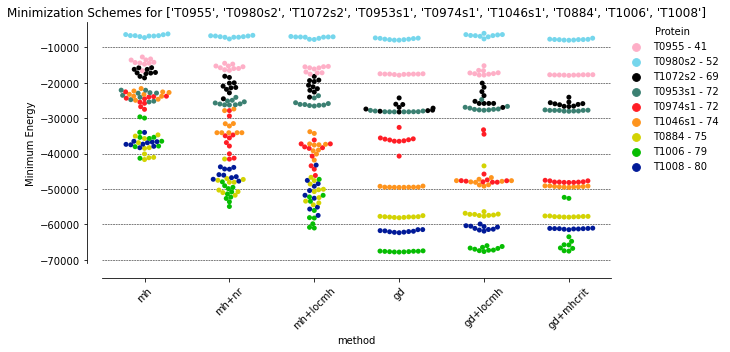

In [11]:
if len(proteins) == 1:
    fig, ax = plt.subplots(figsize=(5,4))
else:
    fig, ax = plt.subplots(figsize=(10,5))

samples = pd.DataFrame(samples)
if boxplot_overlay:
    ax = sns.boxplot(x='method', y='min_energy', data=samples, showmeans=True, 
                meanprops= {
                    "marker":"o",
                    "markerfacecolor":"white", 
                    "markeredgecolor":"black"
                    }
                )
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))

n_colors= len(samples['protein'].unique())
# palette = sns.color_palette("flare", n_colors=n_colors)

# append length to protein to make the legend show length
new_col = []
custom_palette = {}
n=0
for i in range(len(samples['protein'])):
    new_col.append(samples['protein'].iloc[i] + ' - ' + str(samples['length'].iloc[i]))
    if new_col[i] not in custom_palette:
        custom_palette[new_col[i]] = colors_proteins[n]
        n+=1
samples['legend'] = new_col

ax = sns.swarmplot(x='method', y='min_energy', hue='legend', palette=custom_palette, data=samples)
plt.legend(title='Protein', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

ax.set_ylabel('Minimum Energy')

plt.title('Minimization Schemes for ' + str(proteins))
sns.despine(offset=15)
# sns.set_theme()
plt.grid(b=True, which='major', axis='y', linestyle='--', alpha=1, color='k', linewidth=0.5)
plt.setp(ax.get_xticklabels(), rotation=45)
# plt.minorticks_on()
# plt.tick_params(labelsize=12)
# plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show() 